In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [58]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')

In [59]:
df.head(60)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [60]:
# Dependent rent, y
# Independent area, x
x = df.drop('rent', axis=1)

In [61]:
# df.drop('rent', axis=1, inplace=True) #ignore
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [62]:
x.shape

(60, 1)

x = df[['area']]\
x

In [63]:
y = df['rent']
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# Visualization

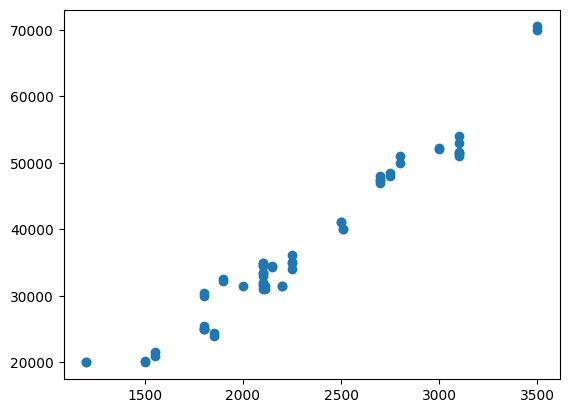

In [64]:
plt.scatter(x, y)

Text(0, 0.5, 'Rent in taka')

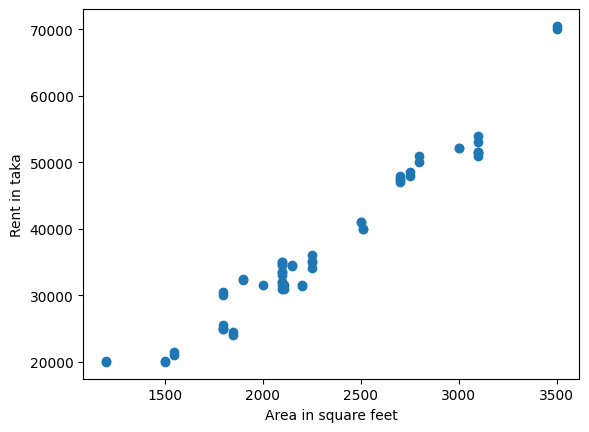

In [65]:
plt.scatter(x, y)
plt.xlabel("Area in square feet")
plt.ylabel("Rent in taka")

In [66]:
x.mean()

area    2289.0
dtype: float64

In [67]:
y.mean()

37269.166666666664

In [68]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = .30)

In [69]:
train.head()

,area,rent
37,1850,24000
41,2100,32020
2,2500,41050
58,2200,31560
50,2110,31000


In [70]:
train.shape

(42, 2)

In [71]:
df.shape

(60, 2)

In [72]:
test.shape

(18, 2)

# Separate train and test for xtrain, xtest, ytrain, ytest

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .30, random_state = 42)

In [77]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [78]:
ytrain.head()

40    34400
4     52100
43    40000
19    47000
34    52200
Name: rent, dtype: int64

# Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
reg = LinearRegression()

In [81]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [82]:
reg.coef_

array([20.68636687])

In [83]:
reg.intercept_

-10252.90474033673

In [84]:
reg.predict([[2510]])

C:\Users\asadu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41669.87610729])

In [86]:
residual = 41669.87610729 - 40000
residual

1669.8761072900015

In [87]:
# y = (m*x) + c
Y = ((reg.coef_)*2510) + (reg.intercept_)
Y

array([41669.87610729])

In [88]:
xtest.head()

,area
0,2000
5,1900
36,1500
45,3100
13,2510


In [89]:
reg.predict(xtest)

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [90]:
ytest

0     31500
5     32500
36    20200
45    51000
13    40050
54    51000
33    35100
48    25500
12    34500
57    25100
46    30000
50    31000
31    35010
3     36100
52    70500
17    21000
8     48000
6     20000
Name: rent, dtype: int64

In [93]:
pred = reg.predict(xtest)
pred

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

# MSE and MAE

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [96]:
mse = mean_squared_error(ytest, pred)
mse

7677066.248378809

In [97]:
mae = mean_absolute_error(ytest, pred)
mae

2103.50832336242

In [99]:
reg.score(xtest, ytest)

0.9515542918540623

# Best Fit Line

Text(0, 0.5, 'Rent in taka')

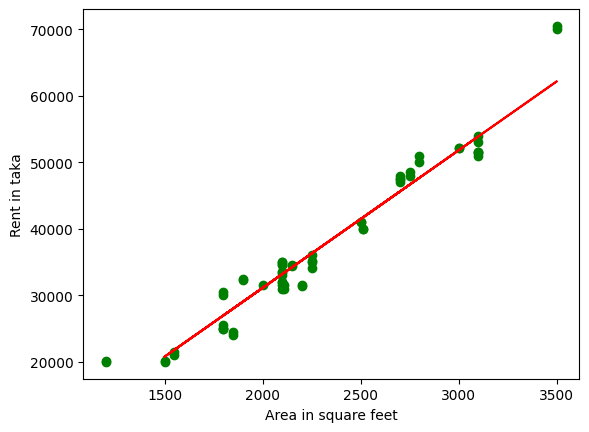

In [103]:
plt.plot(xtest, pred, color='red')
plt.scatter(x, y, color='green')
plt.xlabel("Area in square feet")
plt.ylabel("Rent in taka")